In [1]:
#  basic imports 
# basic imports:
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

## continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 

### 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.



In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

In [3]:
df = pd.read_csv(url)
df.head(6)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
5,1/6/17,Friday,25.3,1.54,23,0.5,11


## 1.) Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [4]:
# convert the date to a datetime
df.loc[:,'Date'] = pd.to_datetime(df.Date)


/var/folders/jd/t05l8rl14_l105k8kn2tdng40000gn/T/ipykernel_57151/1836100510.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Date'] = pd.to_datetime(df.Date)


In [5]:
df.columns = df.columns.str.lower()

In [6]:
# reassign the index
df = df.set_index('date')
df

,day,temperature,rainfall,flyers,price,sales
date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19
2017-12-28,Thursday,37.8,1.25,32,0.5,16
2017-12-29,Friday,39.5,1.25,17,0.5,15


In [7]:
df.columns

Index(['day', 'temperature', 'rainfall', 'flyers', 'price', 'sales'], dtype='object')

In [8]:
# lets make a new column that follows the month
df['month'] = df.index.month_name()

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


Spread of data for temperature


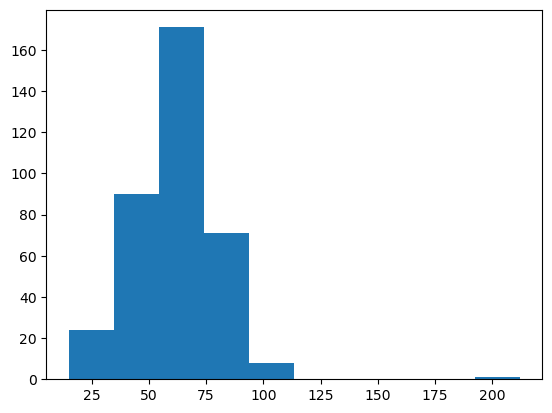

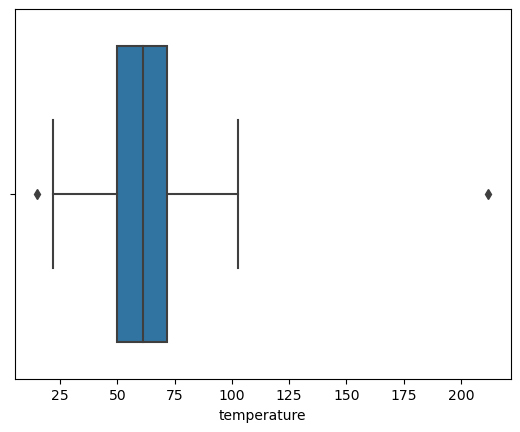

Spread of data for rainfall


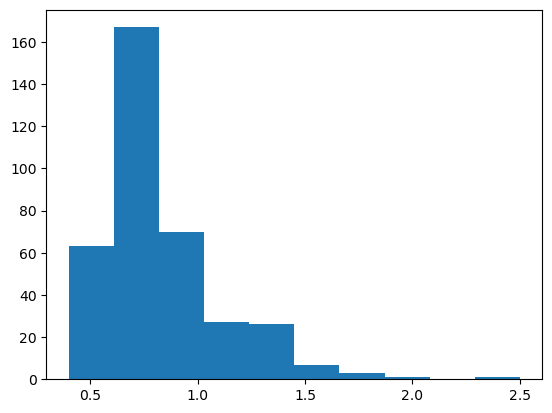

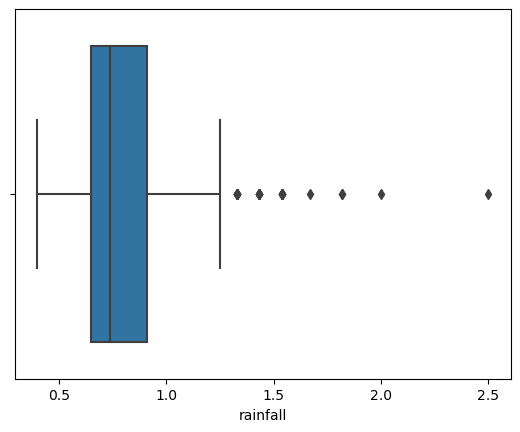

Spread of data for flyers


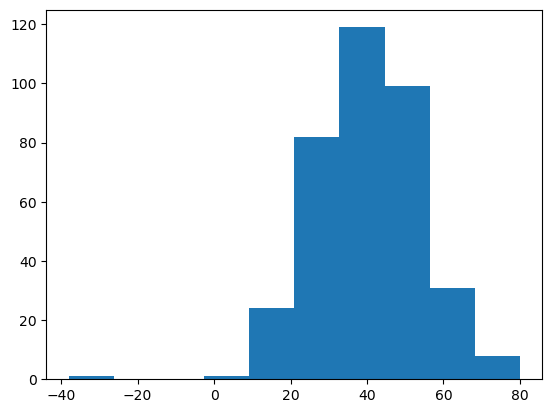

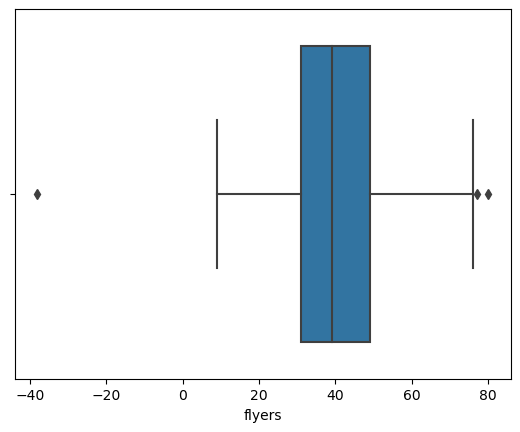

Spread of data for price


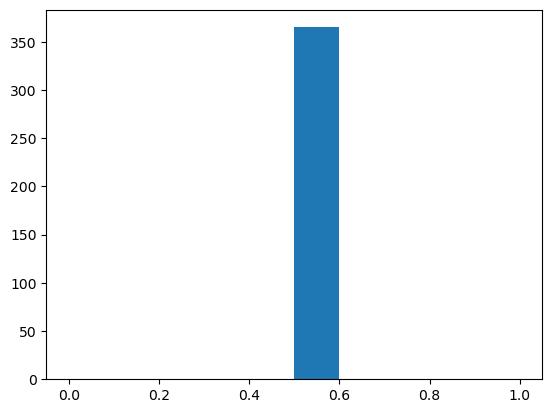

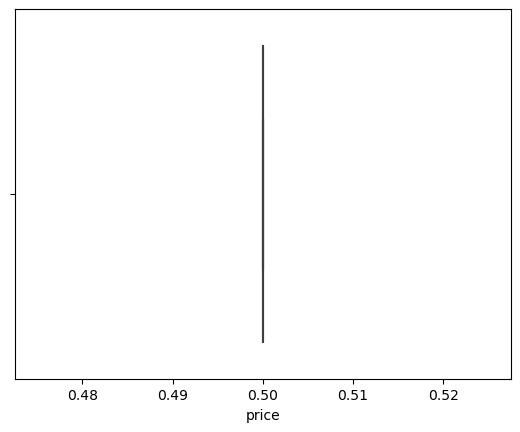

Spread of data for sales


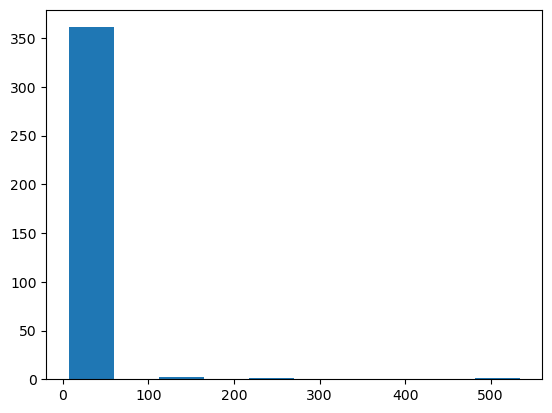

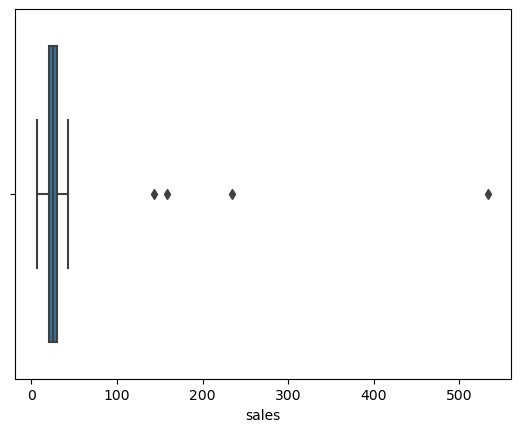

In [12]:
# Exclude the object type columns: df.drop(columns=['month','Day']).columns
for col in df.drop(columns=['month','day']).columns:
    print(f'Spread of data for {col}')
    # make a histogram for each col
    plt.hist(df[col])
    plt.show()
    # make a box plot of each col
    sns.boxplot(data=df, x=col)
    plt.show()
    print('===========')


In [13]:
def get_fences(df, col, k=1.5):
    q1, q3 = df[col].quantile(0.25), \
    df[col].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + k*iqr
    lower_fence = q1 - k*iqr
    return lower_fence, upper_fence

In [15]:
# for organizational purposes
outliers_dict = {}
for col in df.drop(columns=['month','day']).columns:
    outliers_dict[col] = {}
    outliers_dict[col]['bounds'] = get_fences(df,col)
    outliers_dict[col]['df'] = \
    df[(df[col] > outliers_dict[col]['bounds'][1])|
      (df[col] < outliers_dict[col]['bounds'][0])]

In [16]:
outliers_dict.keys()

dict_keys(['temperature', 'rainfall', 'flyers', 'price', 'sales'])

In [17]:
outliers_dict['temperature']['df']

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


In [18]:
outliers_dict['temperature']['bounds']

(16.700000000000003, 104.7)

In [19]:
for col in outliers_dict.keys():
    print(f'Outliers for {col}:')
    print(outliers_dict[col]['df'].to_markdown())
    print(f"Bounds: {outliers_dict[col]['bounds']}")
    print('=====================')
          

Outliers for temperature:
| date                | day      |   temperature |   rainfall |   flyers |   price |   sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-12-31 00:00:00 | Sunday   |          15.1 |       2.5  |        9 |     0.5 |       7 | December |
Bounds: (16.700000000000003, 104.7)
Outliers for rainfall:
| date                | day       |   temperature |   rainfall |   flyers |   price |   sales | month    |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 | January  |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 

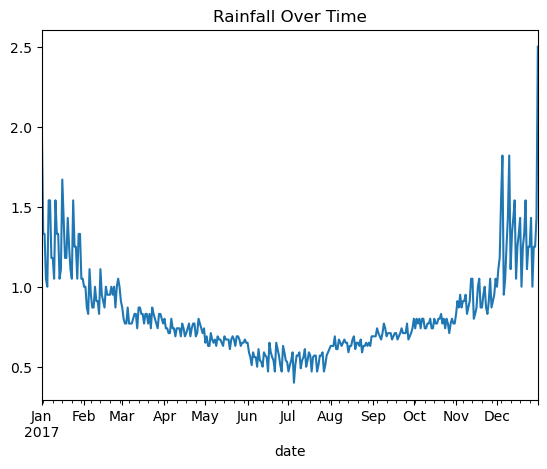

In [20]:
df['rainfall'].plot(title='Rainfall Over Time')
plt.show()

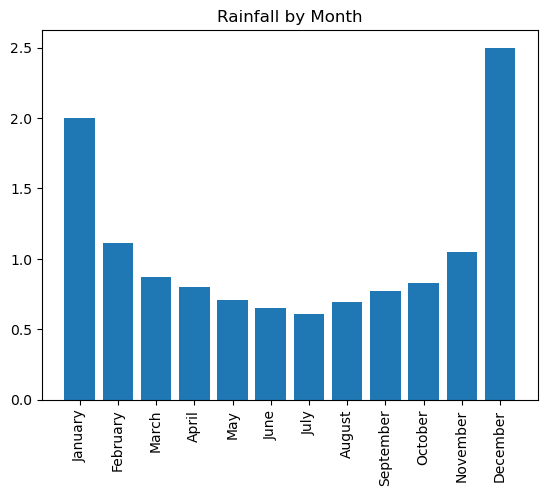

In [21]:
plt.bar(df.month, df.rainfall)
plt.title('Rainfall by Month')
plt.xticks(rotation=90)
plt.show()


In [23]:
# for organizational purposes
outliers_dict_3 = {}
for col in df.drop(columns=['month','day']).columns:
    outliers_dict_3[col] = {}
    outliers_dict_3[col]['bounds'] = get_fences(df,col,k=3.0)
    outliers_dict_3[col]['df'] = \
    df[(df[col] > outliers_dict_3[col]['bounds'][1])|
      (df[col] < outliers_dict_3[col]['bounds'][0])]


In [24]:
for col in outliers_dict_3.keys():
    print(f'Outliers for {col}:')
    print(outliers_dict_3[col]['df'].to_markdown())
    print(f"Bounds: {outliers_dict_3[col]['bounds']}")
    print('=====================')

Outliers for temperature:
| date                | day      |   temperature |   rainfall |   flyers |   price |   sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |
Bounds: (-16.299999999999997, 137.7)
Outliers for rainfall:
| date                | day     |   temperature |   rainfall |   flyers |   price |   sales | month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 | December |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 | December |
| 2017-12-31 00:00:00 | Sunday  |          15.1 |       2.5  |        9

In [25]:
#  z scores:

outliers_dict['rainfall'].keys()


dict_keys(['bounds', 'df'])

In [26]:
col = 'rainfall'
for col in outliers_dict.keys():
    outliers_dict[col]['zdf'] = \
    df[((df[col] - (df[col].mean())) / df[col].std()).abs() > 3] 

In [28]:
outliers_dict['rainfall'].keys()


dict_keys(['bounds', 'df', 'zdf'])

In [29]:
for col in outliers_dict.keys():
    print(f'For {col}:')
    print(outliers_dict[col]['zdf'].to_markdown())
    print('===========')

For temperature:
| date                | day      |   temperature |   rainfall |   flyers |   price |   sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |
For rainfall:
| date                | day     |   temperature |   rainfall |   flyers |   price |   sales | month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-16 00:00:00 | Monday  |          30.6 |       1.67 |       24 |     0.5 |      12 | January  |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 | December |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 | December |
| 2017-12-31 00:00:00

In [30]:
col = 'rainfall'
for col in outliers_dict.keys():
    outliers_dict[col]['zdf'] = \
    df[((df[col] - (df[col].mean())) / df[col].std()).abs() > 2] 


In [31]:
for col in outliers_dict.keys():
    print(f'For {col}:')
    print(outliers_dict[col]['zdf'].to_markdown())
    print('===========')

For temperature:
| date                | day      |   temperature |   rainfall |   flyers |   price |   sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-06-16 00:00:00 | Friday   |          99.3 |       0.47 |       77 |     0.5 |      41 | June     |
| 2017-06-26 00:00:00 | Monday   |         102.6 |       0.47 |       60 |     0.5 |      42 | June     |
| 2017-07-01 00:00:00 | Saturday |         102.9 |       0.47 |       59 |     0.5 |     143 | July     |
| 2017-07-10 00:00:00 | Monday   |          98   |       0.49 |       66 |     0.5 |      40 | July     |
| 2017-07-18 00:00:00 | Tuesday  |          99.3 |       0.47 |       76 |     0.5 |      41 | July     |
| 2017-07-22 00:00:00 | Saturday |          99.6 |       0.47 |       49 |     0.5 |      42 | July     |
| 2017-07-27 00:00:00 | Thurs

### everything appears to be consistent 

In [33]:
# temp around 12-31:
df.loc['2017-12-24':'2017-12-31']['temperature']


date
2017-12-24    35.8
2017-12-25    35.5
2017-12-26    28.9
2017-12-27    42.7
2017-12-28    37.8
2017-12-29    39.5
2017-12-30    30.9
2017-12-31    15.1
Name: temperature, dtype: float64

In [34]:
# lets look at the few days around there:
df.loc['2017-11-20':'2017-11-23']

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,
2017-11-20,Monday,55.6,0.87,41,0.5,22,November
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November


In [36]:
# lets just make that value positive.
df.loc[:,'flyers'] = df.flyers.abs()

In [37]:
df.flyers.describe()


count    365.000000
mean      40.312329
std       13.163427
min        9.000000
25%       31.000000
50%       39.000000
75%       49.000000
max       80.000000
Name: flyers, dtype: float64

In [38]:
# check out temperatures aroune feb 11th for that weird one:
df.loc['2017-02-08':'2017-02-13']

,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February
2017-02-13,Monday,46.4,1.11,34,0.5,18,February


In [40]:
# reassign the temp value for 02/11 for temperature
# to the mean of the day before and the day after
df.loc['2017-02-11','temperature'] = (df.loc['2017-02-10']['temperature'] + df.loc['2017-02-12']['temperature']) / 2

Spread of data for temperature


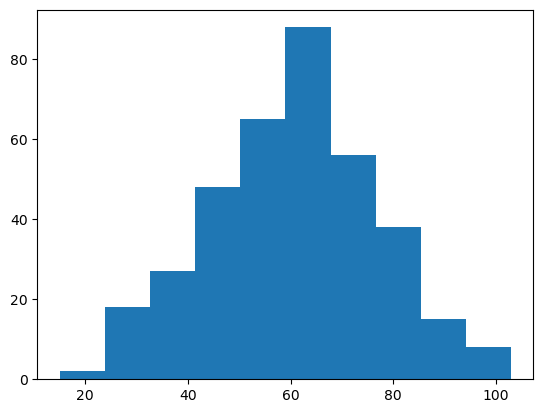

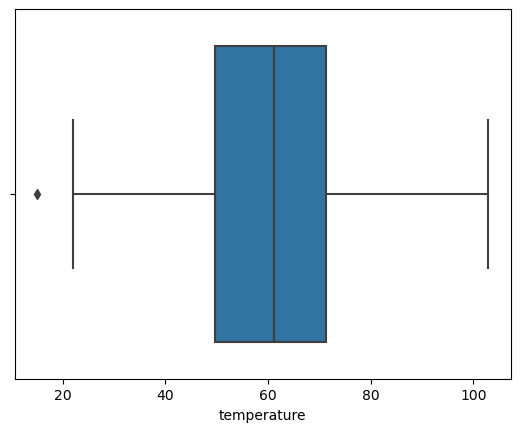

Spread of data for rainfall


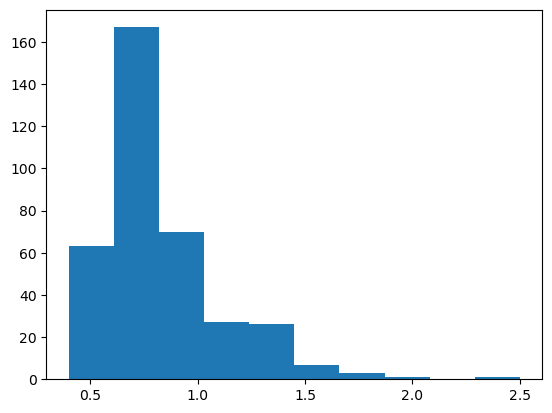

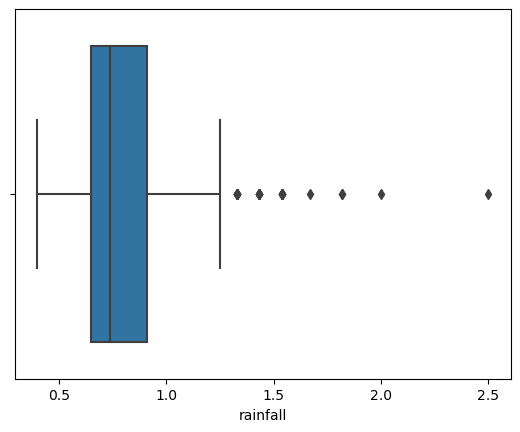

Spread of data for flyers


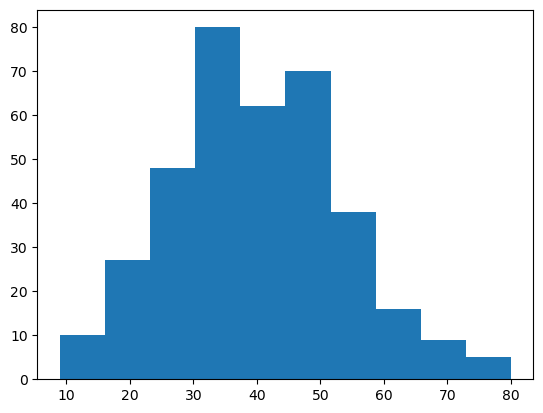

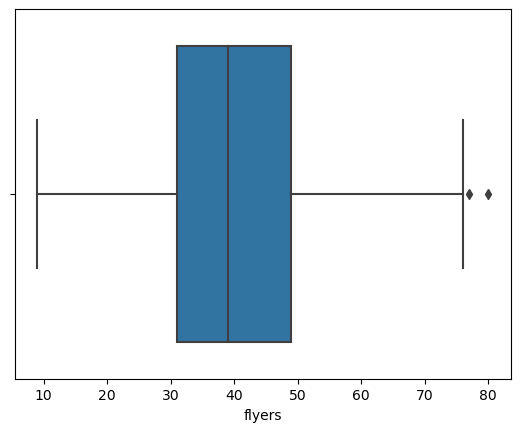

Spread of data for price


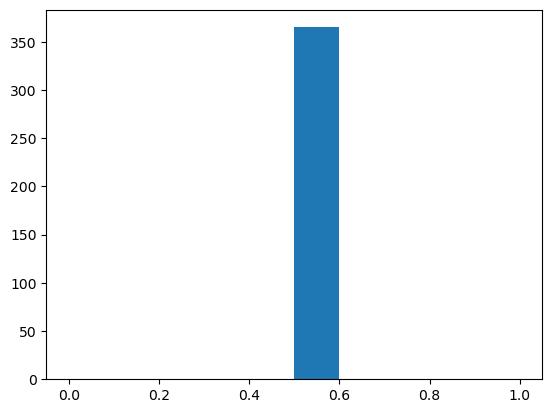

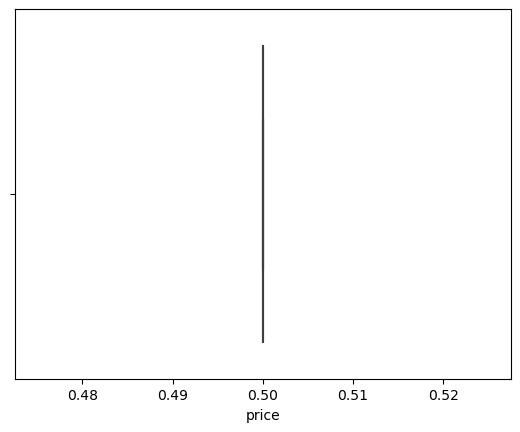

Spread of data for sales


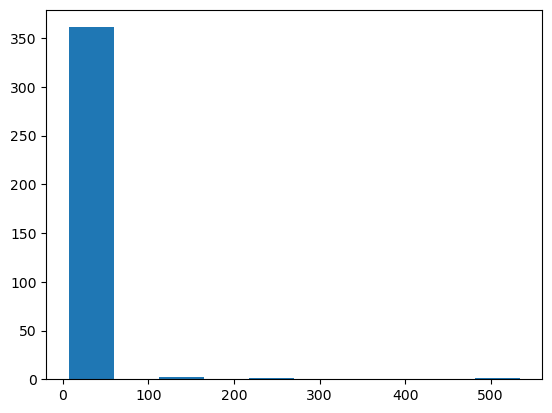

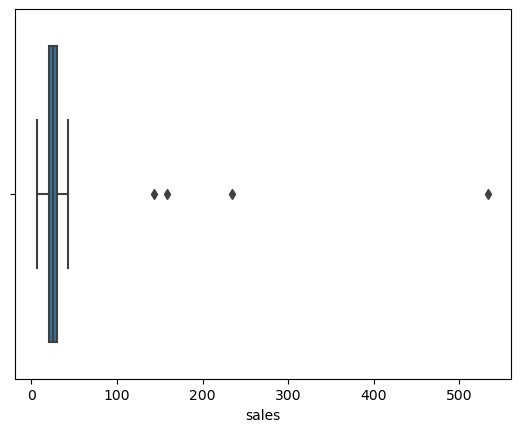

In [42]:
for col in df.drop(columns=['month','day']).columns:
    print(f'Spread of data for {col}')
    # make a histogram for each col
    plt.hist(df[col])
    plt.show()
    # make a box plot of each col
    sns.boxplot(data=df, x=col)
    plt.show()
    print('===========')
